In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt

import generate as generate
from single_layer import *
from smart_train import *
from find_lr import *

In [3]:
# Constants
num = 1
N_test = 102400
noise = 0.2

In [56]:
T = 2 ** 4
M = 1
d = 2
(thetan, an, bn) = generate.generate_single_layer_v2(M, d, num)

(X, Y_noiseless) = generate.generate_single_data_v2(T, an, bn, thetan)
Y = generate.add_noise(Y_noiseless, noise)
input = X[0]
print(X.shape, Y.shape)
print(np.mean(Y))
print(np.std(Y))

(1, 16, 2) (1, 16)
0.16582859482130707
0.1856313499425612


In [57]:
val_ratio = 0.2
hidden_dim = [2, 2, 2]
dropout = 0
batchNorm = False
act = nn.LeakyReLU()
batch_size = 64
x = X[0]
y = Y[0]
lr = 0.002
weight_decay = 0

In [58]:
(T, d) = x.shape
val_size = int(T * val_ratio)
model = MultiLayer(d, hidden_dim, dropout=dropout,
                    act=act, batchNorm=batchNorm)
training_loader = get_data_loader(x[:-val_size], y[:-val_size], batch_size)
validation_loader = get_data_loader(
x[-val_size:], y[-val_size:], batch_size)
loss_fn = torch.nn.MSELoss(reduction='mean')
lr=1e-3
optimizer = torch.optim.Adam(
    model.parameters(), lr=lr, weight_decay=weight_decay)

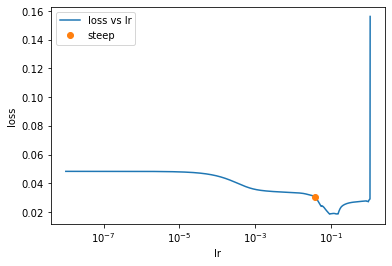

0.03702441025907115

In [59]:
find_lr( 
    model, 
    optimizer, 
    loss_fn,
    training_loader, 
    plot=True, 
    min_lr=1e-8,
    max_lr=10, 
    # method=[steep, min_loss, valley],
)

In [35]:
T = 2 ** 20
M = 64
d = 64
(thetan, an, bn) = generate.generate_single_layer_v2(M, d, num)

(X, Y_noiseless) = generate.generate_single_data_v2(T, an, bn, thetan)
Y = generate.add_noise(Y_noiseless, noise)
input = X[0]
print(X.shape, Y.shape)
print(np.mean(Y))
print(np.std(Y))

(1, 1048576, 64) (1, 1048576)
-0.03152361423540539
1.032154640808651


In [42]:
val_ratio = 0.2
hidden_dim = [10, 10, 10]
dropout = 0
batchNorm = False
act = nn.LeakyReLU()
batch_size = 64
x = X[0]
y = Y[0]
lr = 0.002
weight_decay = 0

In [43]:
(T, d) = x.shape
val_size = int(T * val_ratio)
model = MultiLayer(d, hidden_dim, dropout=dropout,
                    act=act, batchNorm=batchNorm)
training_loader = get_data_loader(x[:-val_size], y[:-val_size], batch_size)
validation_loader = get_data_loader(
x[-val_size:], y[-val_size:], batch_size)
loss_fn = torch.nn.MSELoss(reduction='mean')
lr=1e-3
optimizer = torch.optim.Adam(
    model.parameters(), lr=lr, weight_decay=weight_decay)

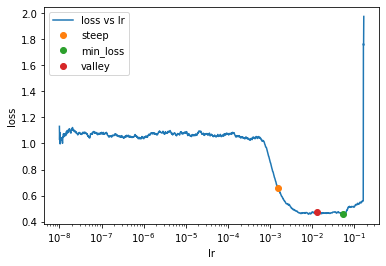

[0.0015333755680552834, 0.054578516526953204, 0.013154225306754173]

In [44]:
find_lr( 
    model, 
    optimizer, 
    loss_fn,
    training_loader, 
    plot=True, 
    min_lr=1e-8,
    max_lr=10, 
    method=[steep, min_loss, valley],
)

In [26]:
from fastai.data.core import DataLoaders
from fastai.learner import Learner
from fastai.optimizer import OptimWrapper
from fastai.callback.all import LRFinder, minimum, slide, valley, steep

(T, d) = x.shape
val_size = int(T * val_ratio)
model = MultiLayer(d, hidden_dim, dropout=dropout,
                    act=act, batchNorm=batchNorm)
training_loader = get_data_loader(x[:-val_size], y[:-val_size], batch_size)
validation_loader = get_data_loader(
x[-val_size:], y[-val_size:], batch_size)
loss_fn = torch.nn.MSELoss(reduction='mean')
def optimizer(params, **kwargs): 
    return OptimWrapper(params, torch.optim.SGD, lr=lr, weight_decay=weight_decay)
dls = DataLoaders(training_loader, validation_loader)

In [27]:
learn = Learner(
    dls, 
    model, 
    loss_func=loss_fn, 
    opt_func=optimizer,
    cbs=[LRFinder()]
)

In [36]:
with learn.no_bar():
    suggestLr = learn.lr_find(start_lr=1e-2, end_lr=10, 
        show_plot=True, num_it=1000, 
        suggest_funcs=[slide, valley, steep],
    ) 

ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [224]:
suggestLr.valley

0.001096478197723627